## Imports

In [19]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
import scipy.signal as signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Variable names

In [20]:
condition_types = ['normal_', 'inner_race_', 'outer_race_']
rotation_types = ['increasing_', 'decreasing_', 'increasing_decreasing_', 'decreasing_increasing_']
trial_types = ['1', '2', '3']
path_to_import = '../Bearing Vibration Data Under Time-Varying Rotational Speed Conditions/data_csv_downsample/'
path_to_export = 'spectogram_map_rotational_data/'

In [21]:
def load_data(path):
    return pd.read_csv(path)

## Automation

(480001,)
(480001,)
(480001,)
(480001,)
(480001,)
(480001,)
(480001,)
(480001,)


KeyboardInterrupt: 

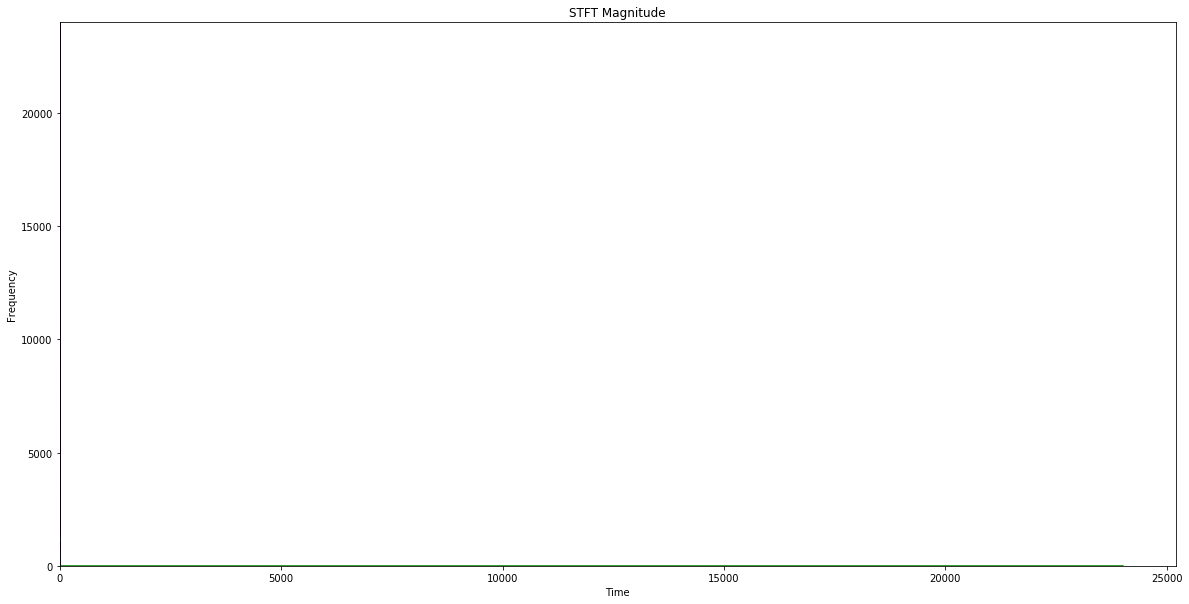

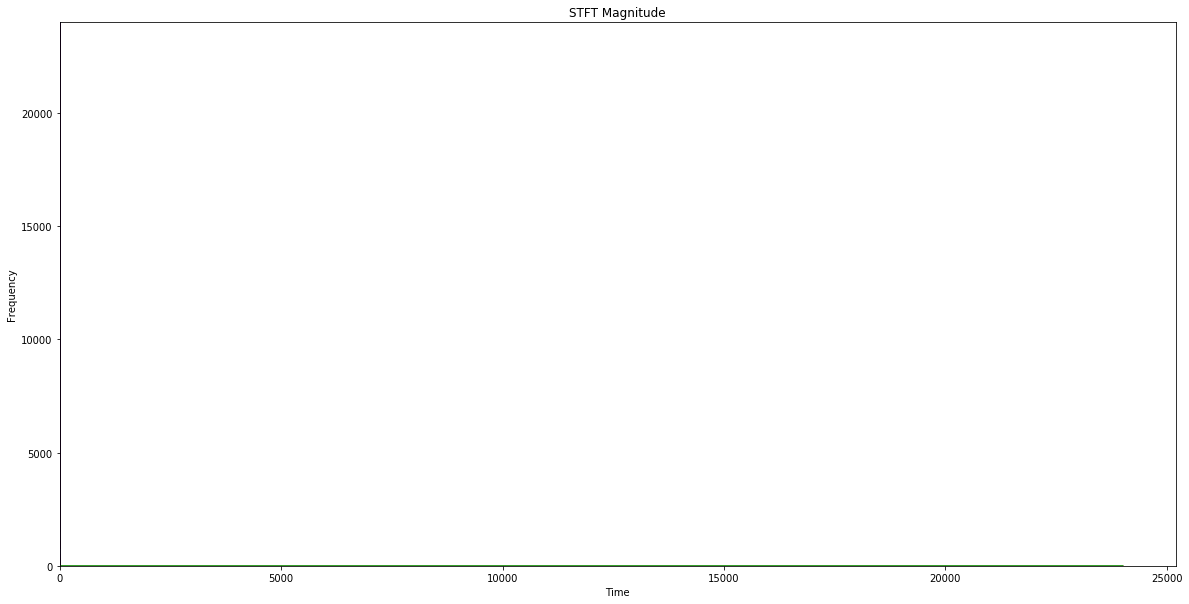

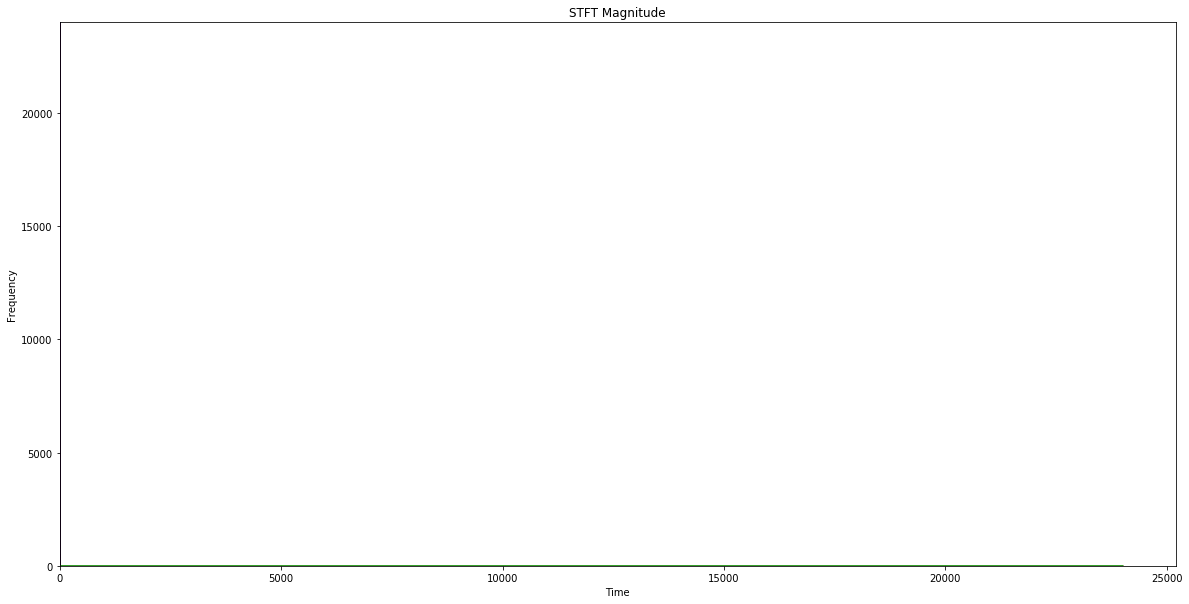

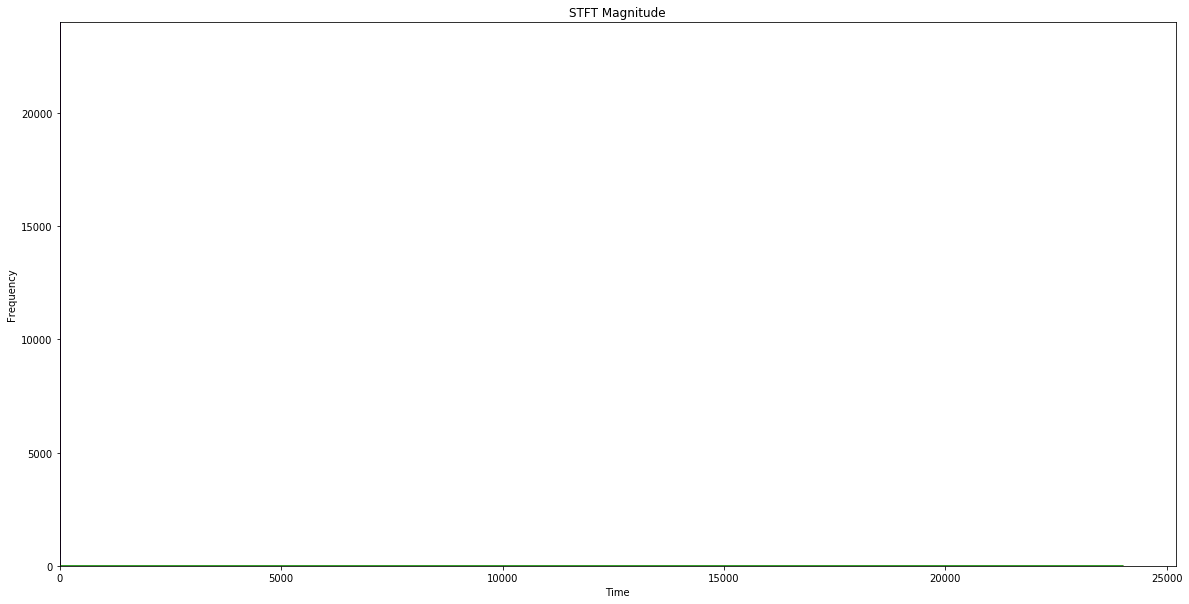

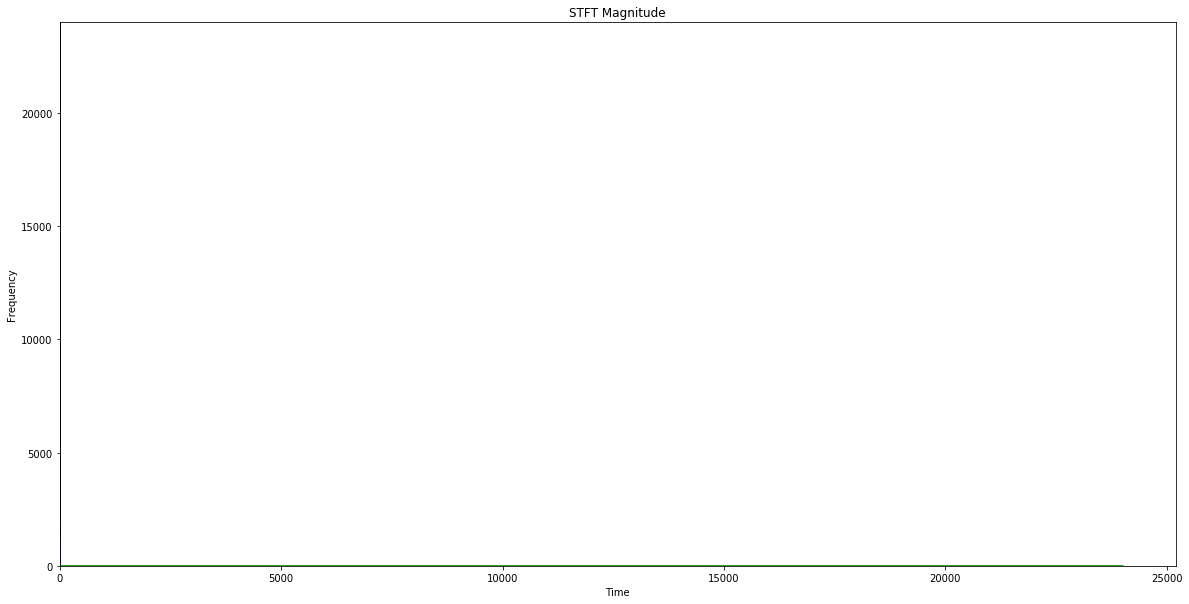

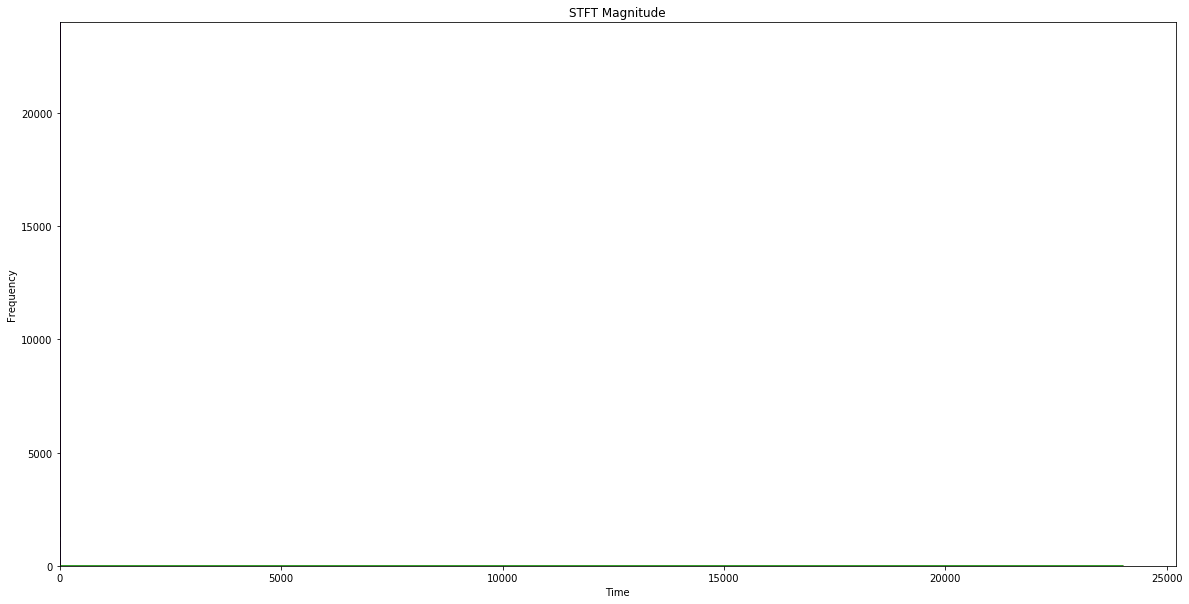

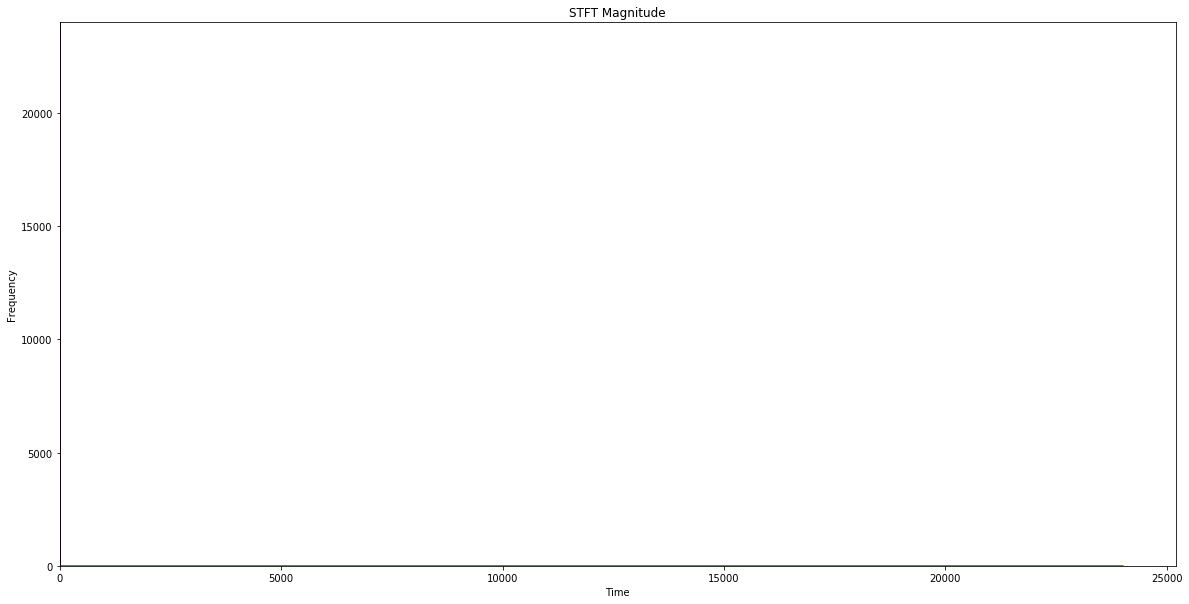

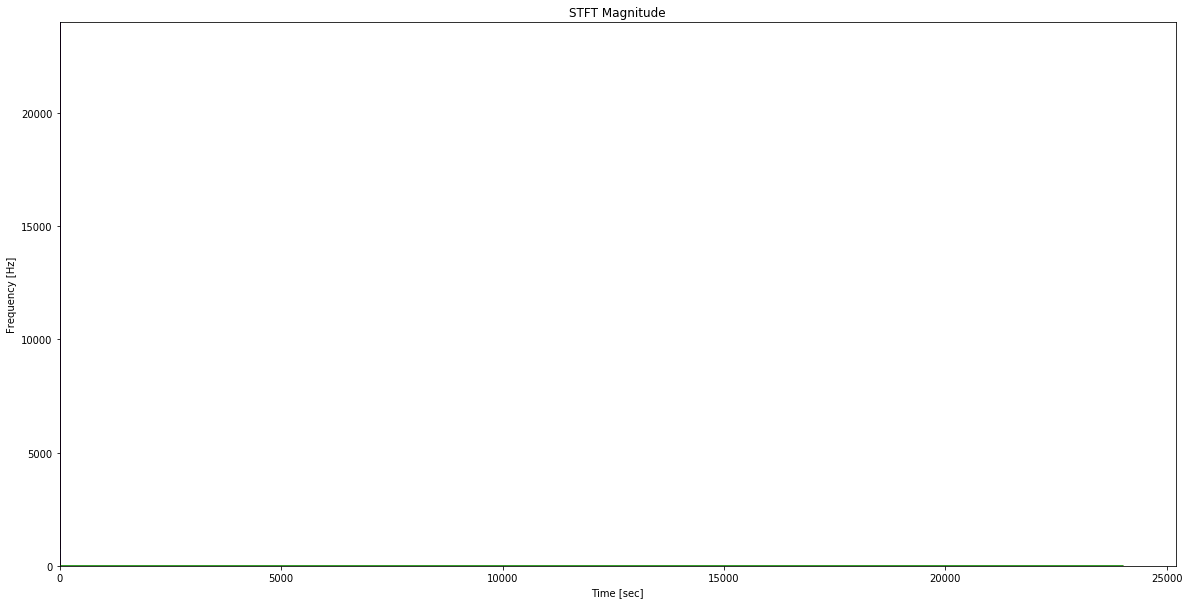

In [23]:
for condition_type in condition_types:
    for rotation_type in rotation_types:
        for trial_type in trial_types:
            
            file_name = condition_type + rotation_type + trial_type
            input_file_name = path_to_import + file_name + '.csv'
            
            current_data = load_data(input_file_name)
            data = current_data.values[:, 0]
            
            
            samples = data.shape[0] #change this if you want smth else
            
            output_file_name = path_to_export + file_name + '_all_data' if samples != 1622 else '_one_rotation'
            
            
            data_to_analyse = data[:]
            
            print(data_to_analyse.shape)
            
            #----------------FFT----------------------
            
#             y = abs(fft(data_to_analise))
            
#             window_size = 2048
#             sampling_rate = 200000
#             time_increment = sampling_rate / window_size
#             no_sample = test_for_one_rotation.shape[0]
            
#             x = np.arange(no_sample) * time_increment
            
#             fig = plt.figure(figsize=(20,10))
#             plt.plot(x,y)
            
            #--------------STFT-----------------------
            
            fs = 48000
            window_size = 2048
            f, t, Zxx = signal.stft(data_to_analyse, fs, nperseg = window_size)
            
            fig = plt.figure(figsize=(20,10))
            plt.plot(f, np.abs(Zxx[: ,:3]))
            plt.ylabel('Amplitude')
            plt.xlabel('Frequency [Hz]')
            plt.savefig(output_file_name + "_stft.png")
            
            #-------------Spectogram from STFT----------
            
            plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
            plt.title('STFT Magnitude')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.savefig(output_file_name + "_signal_stft.png")
            
            #------------Spectogram--------------------
            
            f, t, Sxx = signal.spectrogram(data_to_analyse, fs)
            plt.pcolormesh(t, f, Sxx)
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.savefig(output_file_name + "_signal_spectogram.png")
            
            #-------------Spectogram Pyplot-------------
            
            powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(data_to_analyse, Fs=fs)
            plt.xlabel('Time')
            plt.ylabel('Frequency')
            
            plt.savefig(output_file_name + "_plt_spectrum.png")